<a href="https://colab.research.google.com/github/andymacale/progetto_lab/blob/main/progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install -r requirements.txt

In [8]:
# Importazione delle librerie
import rawpy # per caricare le immagini in formato RAW
import imageio # per gestire l'IO delle immagini

In [ ]:
from google.colab import files
path = files.upload()


if path:
    try:
        with rawpy.imread(path) as raw:
            immagine = raw.postprocess()
    except:
        print('Formato immagine non valido!')

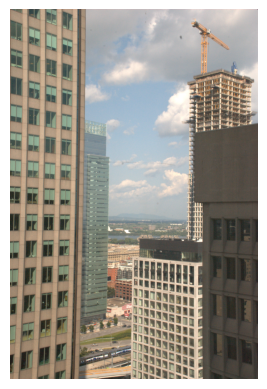

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plotImmagine = plt.imshow(immagine)
plt.axis('off')
plt.show()